In [77]:
import pandas as pd
from datetime import datetime


try:
    # load the dataset into a pandas dataframe
    df = pd.read_csv('ProjectAnalyticsDataset.csv', parse_dates=['START_DATE', 'PLANNED_END_DATE', 'ACTUAL_END_DATE'], date_parser=lambda x: datetime.strptime(x, '%d/%m/%Y'))

    # convert date columns to datetime format
    date_cols = ['START_DATE', 'PLANNED_END_DATE', 'ACTUAL_END_DATE']
    df[date_cols] = df[date_cols].apply(pd.to_datetime)
    
    # calculate actual duration of the project
    df['ACTUAL_DURATION'] = (df['ACTUAL_END_DATE'] - df['START_DATE']).dt.days
    
    # calculate the delay in project completion
    df['DELAY_DAYS'] = (df['ACTUAL_END_DATE'] - df['PLANNED_END_DATE']).dt.days
    
    # calculate the percentage of completion for labor and machine
    df['PERCENTAGE_LABOR'] = df['ESTIMATED_COST'] * df['PERCENTAGE_LABOR'] / 100
    df['PERCENTAGE_MACHINE'] = df['ESTIMATED_COST'] * df['PERCENTAGE_MACHINE'] / 100
    
    # calculate the total project cost
    df['TOTAL_COST'] = df['ESTIMATED_COST'] + df['ADDITIONAL_OVERHEADS']
    
    # calculate the project profitability
    df['PROFIT'] = df['REVENUE'] - df['TOTAL_COST']
    
    # group the data by project type and industry
    grouped = df.groupby(['PROJECT_TYPE', 'INDUSTRY'])
    
    # calculate the average project duration for each group
    average_duration = grouped['ACTUAL_DURATION'].mean()
    
    # calculate the total revenue for each group
    total_revenue = grouped['REVENUE'].sum()
    
    # print the results
    print('Average project duration by project type and industry:')
    print(average_duration)
    print('Total revenue by project type and industry:')
    print(total_revenue)
    
except FileNotFoundError:
    print('Error: CSV file not found.')
    
except pd.errors.EmptyDataError:
    print('Error: CSV file is empty.')
    
except Exception as e:
    print('Error:', e)

Average project duration by project type and industry:
PROJECT_TYPE  INDUSTRY    
External      Automobile      340.685185
              Construction    322.812500
              Education       340.140351
              Financial       348.285714
              HealthCare      348.120690
              Insurance       346.435484
              Other           349.396226
              Telco           342.593750
              Utility         333.750000
Internal      Automobile      347.360656
              Construction    345.200000
              Education       328.113208
              Financial       341.655738
              HealthCare      330.052632
              Insurance       349.500000
              Other           333.873016
              Telco           348.017544
              Utility         333.000000
Name: ACTUAL_DURATION, dtype: float64
Total revenue by project type and industry:
PROJECT_TYPE  INDUSTRY    
External      Automobile      7.299713e+07
              Construction  

In [76]:
import pandas as pd
from datetime import datetime

# load the dataset into a pandas dataframe
df = pd.read_csv('ProjectAnalyticsDataset.csv', parse_dates=['START_DATE', 'PLANNED_END_DATE', 'ACTUAL_END_DATE'], date_parser=lambda x: datetime.strptime(x, '%d/%m/%Y'))

# check for missing values
print(df.isnull().sum())


START_DATE                         0
PLANNED_END_DATE                   0
ACTUAL_END_DATE                    0
PLANNED_DURATION                   0
ACTUAL_DURATION_CUTOFF             0
Duration_Past_Actual_End_Date      0
PROJECT_TYPE                       0
INDUSTRY                           0
SIZE                               0
ENGINEER_IC                        0
CITY                               0
PERCENTAGE_LABOR                   0
PERCENTAGE_MACHINE                 0
ESTIMATED_COST                     0
ACTUAL_COST                        0
ADDITIONAL_OVERHEADS               0
REVENUE                            0
VARIATION_TYPE                   502
CHANGE_COST                      740
PROFIT                             0
dtype: int64


In [75]:
import pandas as pd

from datetime import datetime

# load the dataset into a pandas dataframe
df = pd.read_csv('ProjectAnalyticsDataset.csv', parse_dates=['START_DATE', 'PLANNED_END_DATE', 'ACTUAL_END_DATE'], date_parser=lambda x: datetime.strptime(x, '%d/%m/%Y'))

# convert categorical columns to numerical ones
df = pd.get_dummies(df, columns=['PROJECT_TYPE', 'INDUSTRY'], drop_first=True)

from datetime import datetime
import pandas as pd
# load the dataset into a pandas dataframe
df = pd.read_csv('ProjectAnalyticsDataset.csv', parse_dates=['START_DATE', 'PLANNED_END_DATE', 'ACTUAL_END_DATE'], date_parser=lambda x: datetime.strptime(x, '%d/%m/%Y'))

# group the data by project type
grouped = df.groupby(['PROJECT_TYPE'])

# calculate the total revenue and profit for each group
total_revenue = grouped['REVENUE'].sum()
total_profit = grouped['PROFIT'].sum()

# print the results
print('Total revenue by project type:')
print(total_revenue)
print('Total profit by project type:')
print(total_profit)



Total revenue by project type:
PROJECT_TYPE
External    6.739577e+08
Internal    6.793619e+08
Name: REVENUE, dtype: float64
Total profit by project type:
PROJECT_TYPE
External    7.397781e+07
Internal    7.568222e+07
Name: PROFIT, dtype: float64


In [70]:
import pandas as pd
from datetime import datetime

# load the dataset into a pandas dataframe
df = pd.read_csv('ProjectAnalyticsDataset.csv', parse_dates=['START_DATE', 'PLANNED_END_DATE', 'ACTUAL_END_DATE'], date_parser=lambda x: datetime.strptime(x, '%d/%m/%Y'))

# filter the data for external manufacturing projects over the past 5 years
df = df[(df['PROJECT_TYPE'] == 'External') & (df['START_DATE'].dt.year >= df['START_DATE'].dt.year.max() - 5)]

# calculate the profit for each project
df['PROFIT'] = df['REVENUE'] - df['ACTUAL_COST']

# group the data by external stakeholder's industry and size of the part manufactured
grouped = df.groupby(['INDUSTRY', 'SIZE'])

# calculate the average planned duration, actual duration, and profit for each group
average_planned_duration = grouped['PLANNED_DURATION'].mean()
average_actual_duration = grouped['ACTUAL_DURATION_CUTOFF'].mean()
average_profit = grouped['PROFIT'].mean()

# print the results
print('Average planned duration by industry and size of part manufactured:')
print(average_planned_duration)

print('Average actual duration by industry and size of part manufactured:')
print(average_actual_duration)

print('Average profit by industry and size of part manufactured:')
print(average_profit)

Average planned duration by industry and size of part manufactured:
INDUSTRY      SIZE       
Automobile    Extra Large    273.000000
              Extra Small    328.200000
              Large          308.000000
              Medium         311.909091
              Small          328.750000
Construction  Extra Large    267.250000
              Extra Small    323.428571
              Large          297.200000
              Medium         311.285714
              Small          283.000000
Education     Extra Large    282.428571
              Extra Small    312.363636
              Large          299.000000
              Medium         304.600000
              Small          298.833333
Financial     Extra Large    358.666667
              Extra Small    310.333333
              Large          304.000000
              Medium         324.000000
              Small          287.600000
HealthCare    Extra Large    321.000000
              Extra Small    299.000000
              Large       

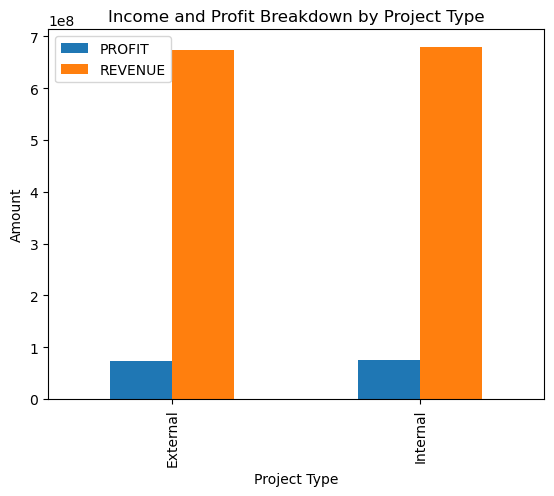

Hypothesis 1:  60
Hypothesis 2:  60
Hypothesis 3:  23


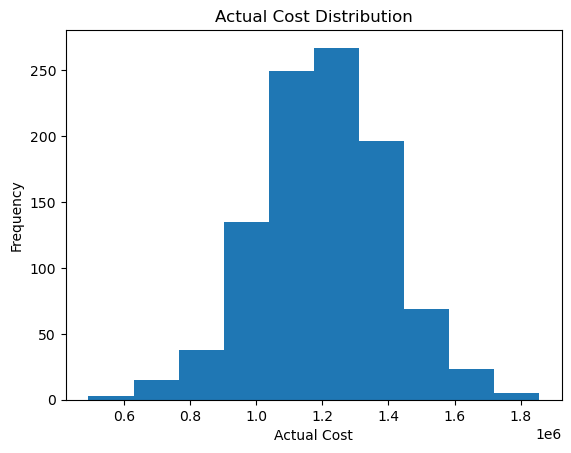

Mean actual cost:  1203659.611
Variance of actual cost:  37821860044.48017
Lower bound:  1009181.1802050141
Upper bound:  1398138.041794986
Final cost is an outlier.


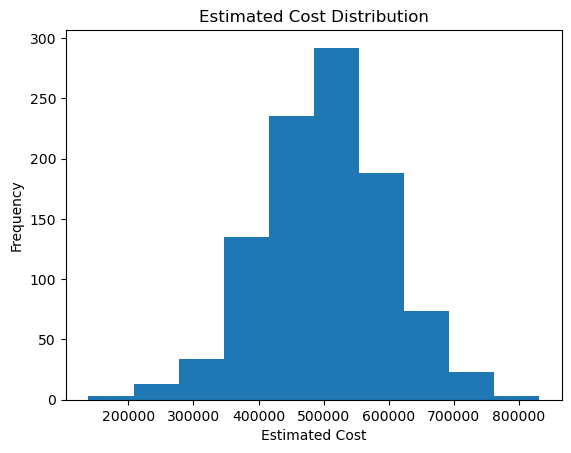

Shapiro-Wilk test result:  ShapiroResult(statistic=0.9985059499740601, pvalue=0.5585384964942932)
Anderson-Darling test result:  AndersonResult(statistic=0.33792870609238435, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# load the data
df = pd.read_csv('ProjectAnalyticsDataset.csv')

# Income and Profit Breakdown
pivot_table = pd.pivot_table(df, values=['REVENUE', 'PROFIT'], index=['PROJECT_TYPE'], aggfunc={'REVENUE': sum, 'PROFIT': sum})
pivot_table.plot(kind='bar')
plt.title('Income and Profit Breakdown by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Amount')
plt.show()

# Hypothesis Testing
hypothesis1 = len(df[(df['PLANNED_DURATION'] > df['ACTUAL_DURATION_CUTOFF']) & (df['PROFIT'] > 0)])
hypothesis2 = len(df[(df['PLANNED_DURATION'] > df['ACTUAL_DURATION_CUTOFF']) & (df['PROFIT'] > 0) & (df['PERCENTAGE_LABOR'] > 0.3)])
hypothesis3 = len(df[(df['SIZE'] == 'Large') & (df['INDUSTRY'] == 'Utility')])
print('Hypothesis 1: ', hypothesis1)
print('Hypothesis 2: ', hypothesis2)
print('Hypothesis 3: ', hypothesis3)

# Actual Cost Analysis
plt.hist(df['ACTUAL_COST'], bins=10)
plt.title('Actual Cost Distribution')
plt.xlabel('Actual Cost')
plt.ylabel('Frequency')
plt.show()

mean_actual_cost = df['ACTUAL_COST'].mean()
var_actual_cost = df['ACTUAL_COST'].var()
std_actual_cost = df['ACTUAL_COST'].std()
lower_bound = mean_actual_cost - std_actual_cost
upper_bound = mean_actual_cost + std_actual_cost
print('Mean actual cost: ', mean_actual_cost)
print('Variance of actual cost: ', var_actual_cost)
print('Lower bound: ', lower_bound)
print('Upper bound: ', upper_bound)

final_cost = 450000
if final_cost < lower_bound or final_cost > upper_bound:
    print('Final cost is an outlier.')
else:
    print('Final cost is within the expected range.')

# Estimated Cost Analysis
plt.hist(df['ESTIMATED_COST'], bins=10)
plt.title('Estimated Cost Distribution')
plt.xlabel('Estimated Cost')
plt.ylabel('Frequency')
plt.show()

shapiro_test = stats.shapiro(df['ESTIMATED_COST'])
print('Shapiro-Wilk test result: ', shapiro_test)

anderson_test = stats.anderson(df['ESTIMATED_COST'])
print('Anderson-Darling test result: ', anderson_test)



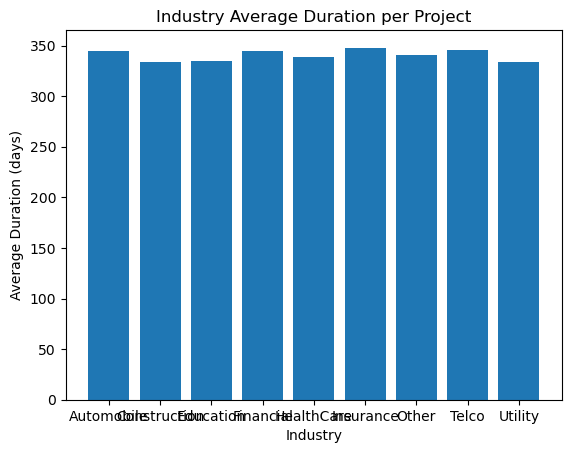

In [57]:
import matplotlib.pyplot as plt

# calculate the industry average duration for each project
industry_average_duration = df.groupby(['INDUSTRY'])['ACTUAL_DURATION_CUTOFF'].mean()

# plot the industry average duration
plt.bar(industry_average_duration.index, industry_average_duration.values)
plt.title('Industry Average Duration per Project')
plt.xlabel('Industry')
plt.ylabel('Average Duration (days)')
plt.show()